# Exercise 4.10 Task Part 2 - Experimentation

## Contents

1. Import libraries and ords_prods_active
    - customers with less than 5 orders already removed.
2. Experimentation

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

### Import Orders_products_active from Exercise 4.10.1 as df

In [3]:
# Setting path to Achievement 4 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data','ords_prods_active.csv'), index_col = False)

### Importing customer profile dataframes for further analysis

In [14]:
df_divwid = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_divwid.csv'), index_col = False)
df_drizly = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_drizly.csv'), index_col = False)
df_nightowl = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_nightowl.csv'), index_col = False)
df_whale = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_whale.csv'), index_col = False)
df_yp = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_young_parent.csv'), index_col = False)

In [15]:
pd.options.display.max_columns = None

In [17]:
df_whale.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,max_order,low_activity,generation,customer_profile,mean_order_hour,favorite_department,LTV
0,608,2910377,3794,67,5,12,4.0,False,196,1,0,Soda,77,7,9.0,Mid range product,Regularly busy,Most orders,Loyal customer,Low spender,Frequent customer,Male,Maine,65,2/16/2018,1,married,165736,Northeast,86,N,Baby Boomer,Whale,13.925303,20,11893.4
1,5619,1368258,31355,61,0,8,3.0,False,196,12,0,Soda,77,7,9.0,Mid range product,Busiest days,Average orders,Loyal customer,Low spender,Frequent customer,Female,South Carolina,42,1/18/2020,1,married,109995,South,93,N,Millennial,Whale,11.826437,21,13041.3
2,5620,2715416,31355,63,4,10,2.0,False,196,14,1,Soda,77,7,9.0,Mid range product,Slowest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,South Carolina,42,1/18/2020,1,married,109995,South,93,N,Millennial,Whale,11.826437,21,13041.3
3,5621,2011851,31355,65,1,14,1.0,False,196,5,1,Soda,77,7,9.0,Mid range product,Busiest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,South Carolina,42,1/18/2020,1,married,109995,South,93,N,Millennial,Whale,11.826437,21,13041.3
4,5622,2944443,31355,69,1,14,2.0,False,196,11,1,Soda,77,7,9.0,Mid range product,Busiest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,South Carolina,42,1/18/2020,1,married,109995,South,93,N,Millennial,Whale,11.826437,21,13041.3


In [23]:
df['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

Reminder of departments:

- '1': {'department': 'frozen'},
- '2': {'department': 'other'},
- '3': {'department': 'bakery'},
- '4': {'department': 'produce'},
- '5': {'department': 'alcohol'},
- '6': {'department': 'international'},
- '7': {'department': 'beverages'},
- '8': {'department': 'pets'},
- '9': {'department': 'dry goods pasta'},
- '10': {'department': 'bulk'},
- '11': {'department': 'personal care'},
- '12': {'department': 'meat seafood'},
- '13': {'department': 'pantry'},
- '14': {'department': 'breakfast'},
- '15': {'department': 'canned goods'},
- '16': {'department': 'dairy eggs'},
- '17': {'department': 'household'},
- '18': {'department': 'babies'},
- '19': {'department': 'snacks'},
- '20': {'department': 'deli'},
- '21': {'department': 'missing'}}

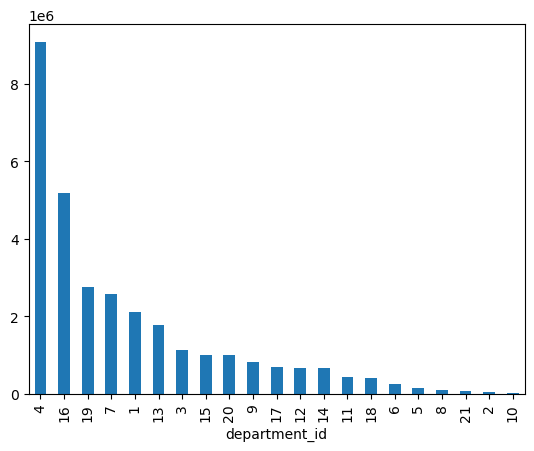

In [24]:
freq_department_bar = df['department_id'].value_counts(dropna = False).plot.bar()

#top categories: produce, dairy/eggs, snacks, beverages, frozen

In [25]:
freq_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_freq.png'))

## Aggregate the min/mean/max on a customer-profile level for usage frequency (orders) and expenditure (amount spent)

In [21]:
df.groupby('customer_profile').agg({'max_order':['mean','min','max']})

max_order        
                       mean min max
customer_profile                   
DivWid            34.348694   5  99
Drizly            15.355394   5  74
Nightowl           9.059677   5  18
Whale             77.985122  27  99
Young Parent      35.443911   5  99

In [20]:
df.groupby('customer_profile').agg({'LTV':['mean','min','max']})

LTV                  
                          mean      min      max
customer_profile                                
DivWid             3315.963933     15.7  24307.1
Drizly              446.330930      7.7   2723.2
Nightowl            630.360484     45.2   1815.7
Whale             12630.166451  10014.1  26394.9
Young Parent       3566.815369     13.3  18448.1

Seeing these results in 4.10.1 script actually, not sure where the disconnect is/ if I just need to integrate them into the final deliverable.

<Axes: xlabel='department_id'>

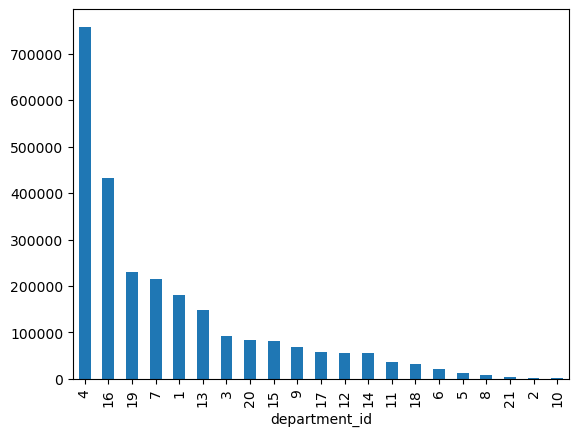

In [23]:
df_divwid['department_id'].value_counts(dropna = False).plot.bar()

<Axes: xlabel='department_id'>

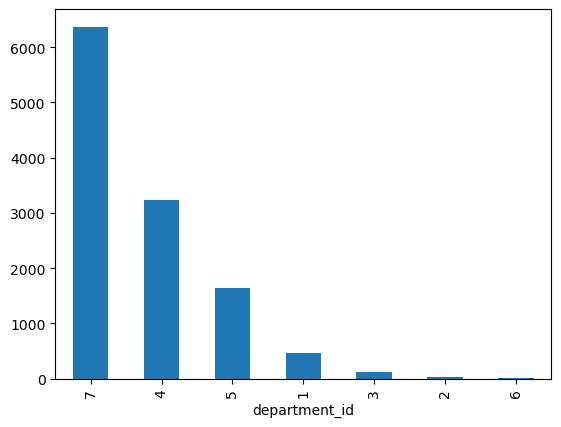

In [24]:
df_drizly['department_id'].value_counts(dropna = False).plot.bar()

<Axes: xlabel='department_id'>

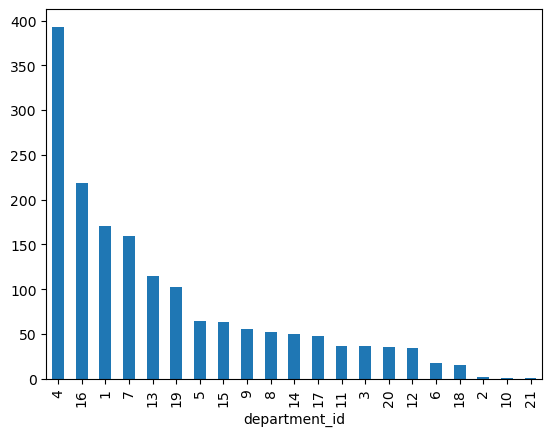

In [25]:
df_nightowl['department_id'].value_counts(dropna = False).plot.bar()

<Axes: xlabel='department_id'>

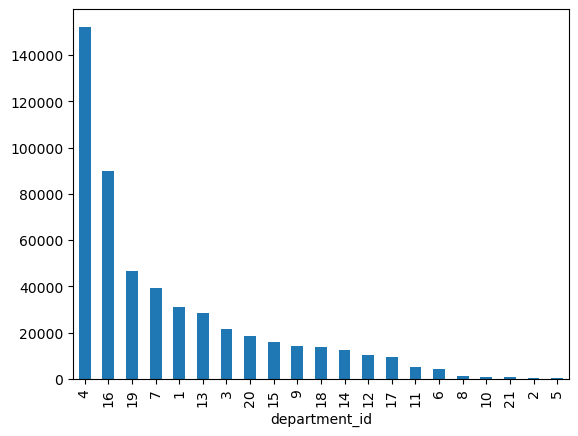

In [26]:
df_whale['department_id'].value_counts(dropna = False).plot.bar()

<Axes: xlabel='department_id'>

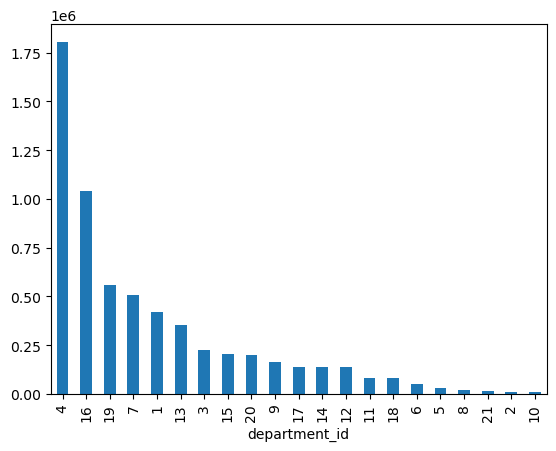

In [27]:
df_yp['department_id'].value_counts(dropna = False).plot.bar()